**NAME : SANKALPA V.L.T.**

**REG No. : EG/2015/2757**

**E-mail : wltsankalpa@gmail.com**

**Contact No : 077-4588562**

---

# Q1 
## part 1 :- Identifing outlier trades based on Executed Price & Executed Qty using Hierarchical Clustering
An outlier is a data point that differs significantly from other observations. Clustering is the task of dividing the population or data points into a number of groups such that data points in the same groups are more similar and data points in different groups are more differs. Therefore, when clusters form outlier data points will be cluster in to an outlier clusters.

In [64]:
# Importing the libraries

import matplotlib.pyplot as plt
import pandas as pd
import scipy.cluster.hierarchy as sch
from apyori import apriori
from sklearn.cluster import AgglomerativeClustering
# Upload Trade.csv file to google colab
from google.colab import files
uploaded = files.upload()

Saving apyori.py to apyori (1).py
Saving Trades.csv to Trades (3).csv


### Data preprocessing


In [25]:
# Importing the trades data as pandas DataFrame
dataset = pd.read_csv('Trades.csv')
dataset

,Trade Date,Executed Qty,Executed Price,Stock,Buy Order ID,Sell Order ID,Sell Broker ID,Buy Broker ID
0,01JUL2014:09:00:00,1,3.09,BE0160342011,10442101280,10442101281,B11293128,B11293128
1,01JUL2014:09:00:00,1,34.30,CH0008853209,10442101321,10442101322,A170820,A170820
2,01JUL2014:09:00:00,1,2.96,ES0109429037,10442101354,10442101355,B169653,B169653
3,01JUL2014:09:00:00,1,19.71,ES0158252033,10442111564,10442101372,A163878,B204480
4,01JUL2014:09:00:00,1,19.71,ES0158252033,10442101373,10442101368,A2007006,A163878
5,01JUL2014:09:00:00,2,19.71,ES0158252033,10442111564,10442101377,B133386,B204480
6,01JUL2014:09:00:00,6,19.71,ES0158252033,10442101375,10442101359,B128778,B128778
7,01JUL2014:09:00:00,12,19.71,ES0158252033,10442101383,10442101368,A2007006,C439398190
8,01JUL2014:09:00:00,18,19.71,ES0158252033,10442101367,10442101368,A2007006,C424759231
9,01JUL2014:09:00:00,44,19.71,ES0158252033,10442101375,10442101368,A2007006,B128778


In [26]:
# Filtering the trades of stock ES0158252033 and create a new DataFrame
Trades = dataset.loc[dataset.Stock=='ES0158252033', :]
Trades

,Trade Date,Executed Qty,Executed Price,Stock,Buy Order ID,Sell Order ID,Sell Broker ID,Buy Broker ID
3,01JUL2014:09:00:00,1,19.71,ES0158252033,10442111564,10442101372,A163878,B204480
4,01JUL2014:09:00:00,1,19.71,ES0158252033,10442101373,10442101368,A2007006,A163878
5,01JUL2014:09:00:00,2,19.71,ES0158252033,10442111564,10442101377,B133386,B204480
6,01JUL2014:09:00:00,6,19.71,ES0158252033,10442101375,10442101359,B128778,B128778
7,01JUL2014:09:00:00,12,19.71,ES0158252033,10442101383,10442101368,A2007006,C439398190
8,01JUL2014:09:00:00,18,19.71,ES0158252033,10442101367,10442101368,A2007006,C424759231
9,01JUL2014:09:00:00,44,19.71,ES0158252033,10442101375,10442101368,A2007006,B128778
10,01JUL2014:09:00:00,75,19.71,ES0158252033,10442111564,10442101368,A2007006,B204480
11,01JUL2014:09:00:03,14,20.60,ES0158252033,10434416337,10442101363,C8329321,C11084986
12,01JUL2014:09:00:03,64,20.40,ES0158252033,10442101384,10427330904,C9324721,A8605026


In [27]:
# Add indexing column to Dataframe (Lets consider this index represent the Trade Date)
Trades['Index'] = range(1, len(Trades) + 1)
Trades

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Trade Date,Executed Qty,Executed Price,Stock,Buy Order ID,Sell Order ID,Sell Broker ID,Buy Broker ID,Index
3,01JUL2014:09:00:00,1,19.71,ES0158252033,10442111564,10442101372,A163878,B204480,1
4,01JUL2014:09:00:00,1,19.71,ES0158252033,10442101373,10442101368,A2007006,A163878,2
5,01JUL2014:09:00:00,2,19.71,ES0158252033,10442111564,10442101377,B133386,B204480,3
6,01JUL2014:09:00:00,6,19.71,ES0158252033,10442101375,10442101359,B128778,B128778,4
7,01JUL2014:09:00:00,12,19.71,ES0158252033,10442101383,10442101368,A2007006,C439398190,5
8,01JUL2014:09:00:00,18,19.71,ES0158252033,10442101367,10442101368,A2007006,C424759231,6
9,01JUL2014:09:00:00,44,19.71,ES0158252033,10442101375,10442101368,A2007006,B128778,7
10,01JUL2014:09:00:00,75,19.71,ES0158252033,10442111564,10442101368,A2007006,B204480,8
11,01JUL2014:09:00:03,14,20.60,ES0158252033,10434416337,10442101363,C8329321,C11084986,9
12,01JUL2014:09:00:03,64,20.40,ES0158252033,10442101384,10427330904,C9324721,A8605026,10


In [65]:
# Create NumPy array with Execute Qty and Execute Price of Trades
X = Trades.iloc[:, [ 1, 2]].values
X

array([[  1.  ,  19.71],
       [  1.  ,  19.71],
       [  2.  ,  19.71],
       ...,
       [200.  ,  10.71],
       [200.  ,  10.71],
       [179.  ,  10.71]])

### Using the elbow method to find the optimal number of clusters suitable to identify outliners
The elbow method plot graph between the number of clusters and **Within-Cluster-Sum-of-Squares (WCSS)**. When the gradient of graph become constant corresponding number of clusters can be consider as the optimal number of clusters. 


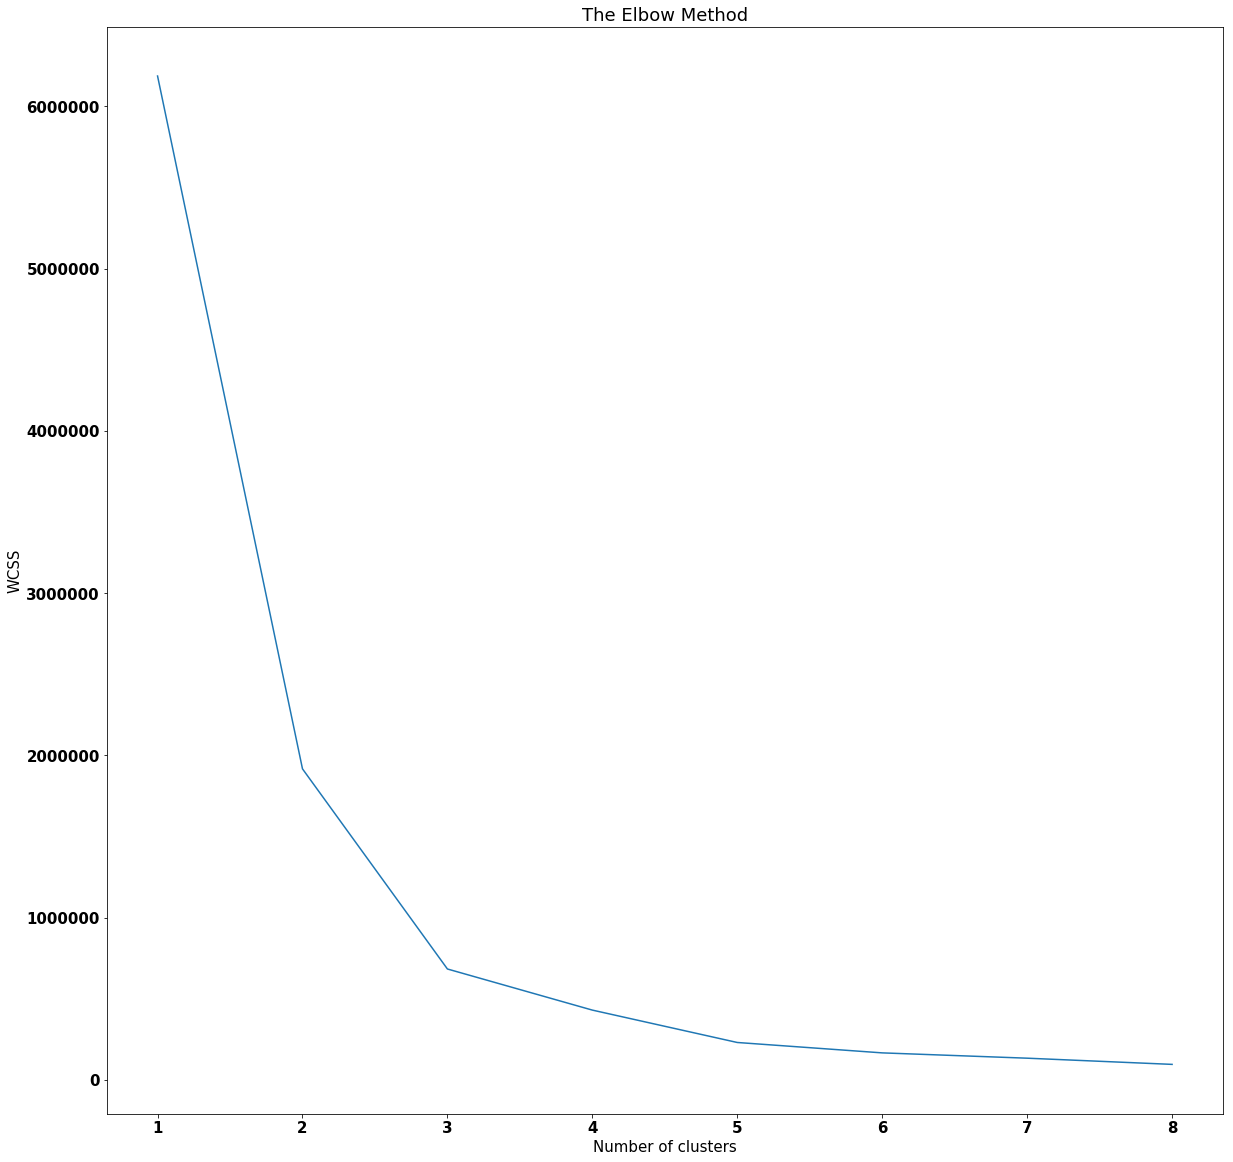

In [66]:
# change the font siXe on a matplotlib plot
font = {'family' : 'normal','weight' : 'bold','size'   : 15}
plt.rc('font', **font)

# change the graph siXe of a matplotlib plot
plt.rcParams['figure.figsize'] = (20, 20)

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 9):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 9), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

According to above graph we can identify optimal number of clusters as five for this problem.
### Using the dendrogram to find the optimal number of clusters suitable to identify outliners
Since the main point of Hierarchical Clustering is to make the dendrogram, because dendrogram contain the memory of Hierarchical Clustering algorithm, then work your way down to see the diﬀerent combinations of clusters until having a single large cluter. Therefore in Hierarchical Clustering to double check the optimal number of clusters its possible to use **dendrogram**.The dendrogram itself that allows to ﬁnd the best clustering conﬁguration.




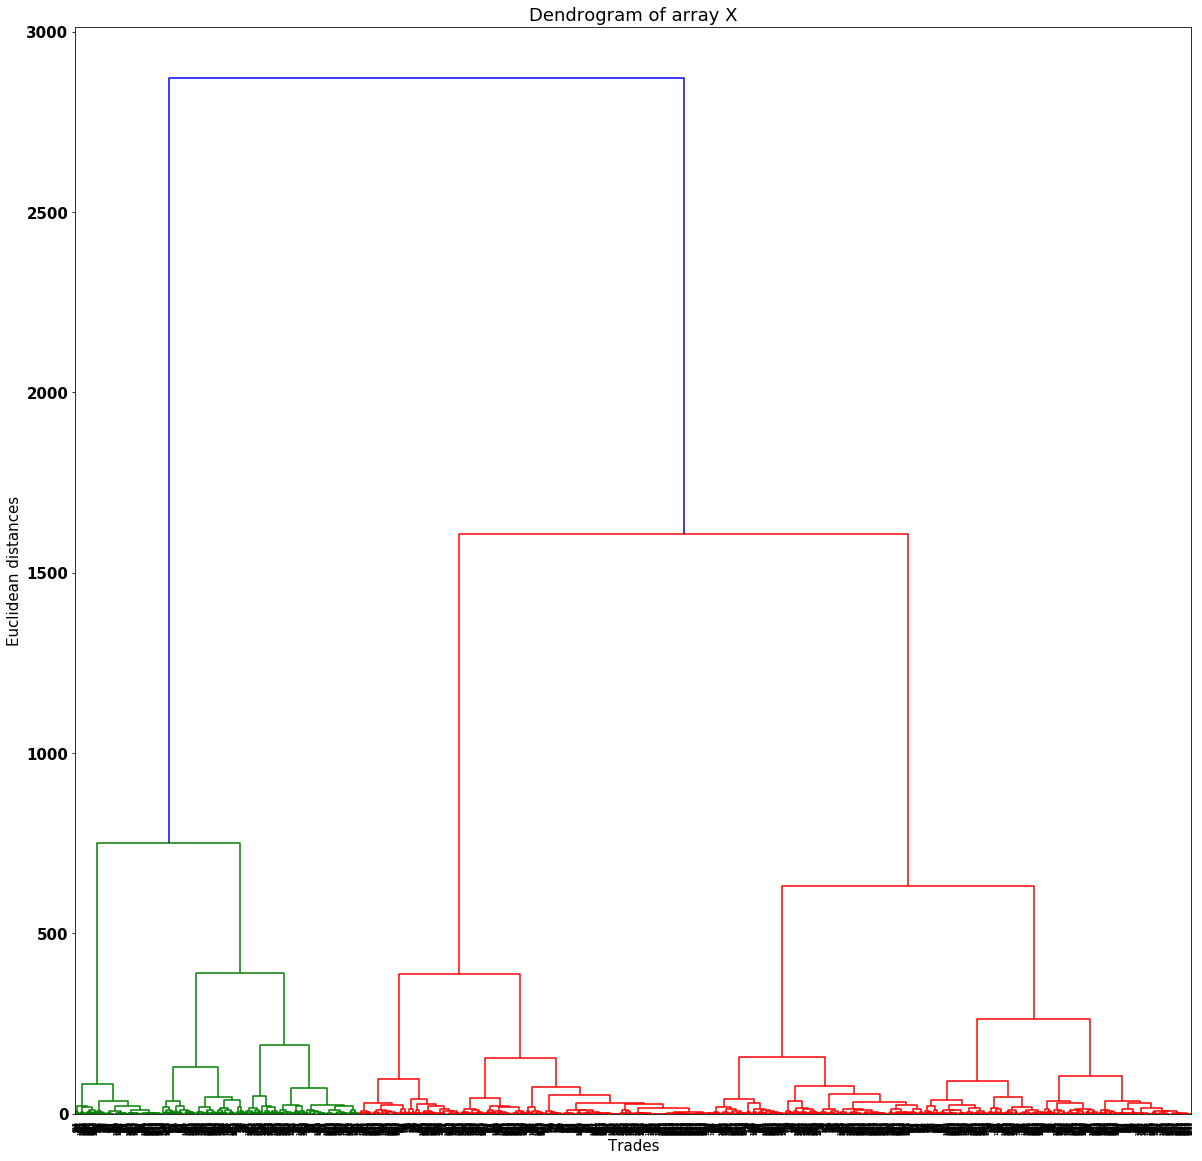

In [33]:
# plot dendrogram for X array
dendrogram_X = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram of array X')
plt.xlabel('Trades')
plt.ylabel('Euclidean distances')
plt.show()

by drawing line across 500 euclidean distance it possible to determine the optimal number of clusters as five clusters

### Apply Hierarchical Clustering



```

```



In [34]:
# Fitting Hierarchical Clustering to the array X
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
# Create Array with clusters
X_hc = hc.fit_predict(X)
X_hc

array([4, 4, 4, ..., 3, 3, 0])

In [35]:
# Add a X_hc array as Cluster column to a Trades dataframe
Trades['Cluster'] = X_hc
Trades

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Trade Date,Executed Qty,Executed Price,Stock,Buy Order ID,Sell Order ID,Sell Broker ID,Buy Broker ID,Index,Cluster
3,01JUL2014:09:00:00,1,19.71,ES0158252033,10442111564,10442101372,A163878,B204480,1,4
4,01JUL2014:09:00:00,1,19.71,ES0158252033,10442101373,10442101368,A2007006,A163878,2,4
5,01JUL2014:09:00:00,2,19.71,ES0158252033,10442111564,10442101377,B133386,B204480,3,4
6,01JUL2014:09:00:00,6,19.71,ES0158252033,10442101375,10442101359,B128778,B128778,4,4
7,01JUL2014:09:00:00,12,19.71,ES0158252033,10442101383,10442101368,A2007006,C439398190,5,4
8,01JUL2014:09:00:00,18,19.71,ES0158252033,10442101367,10442101368,A2007006,C424759231,6,4
9,01JUL2014:09:00:00,44,19.71,ES0158252033,10442101375,10442101368,A2007006,B128778,7,1
10,01JUL2014:09:00:00,75,19.71,ES0158252033,10442111564,10442101368,A2007006,B204480,8,2
11,01JUL2014:09:00:03,14,20.60,ES0158252033,10434416337,10442101363,C8329321,C11084986,9,4
12,01JUL2014:09:00:03,64,20.40,ES0158252033,10442101384,10427330904,C9324721,A8605026,10,2


### Visualising the clusters

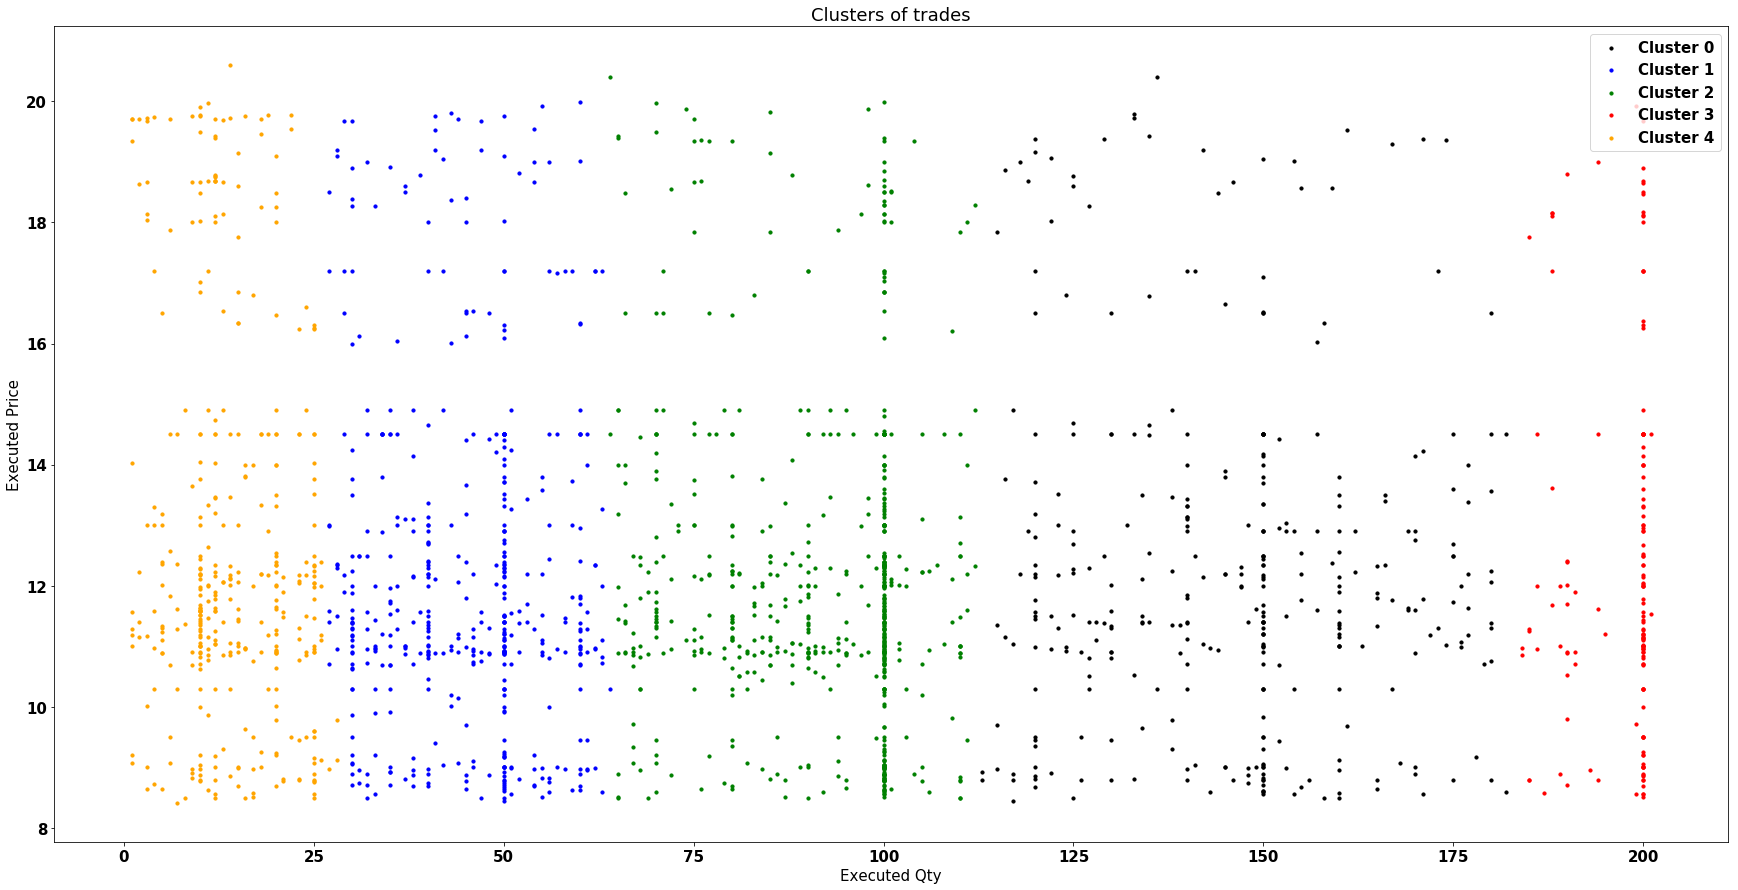

In [36]:
# change the graph size of a matplotlib plot
plt.rcParams['figure.figsize'] = (30, 15)
# Visualising the clusters
plt.scatter(X[X_hc == 0, 0], X[X_hc == 0, 1], s = 10, c = 'black', label = 'Cluster 0')
plt.scatter(X[X_hc == 1, 0], X[X_hc == 1, 1], s = 10, c = 'blue', label = 'Cluster 1')
plt.scatter(X[X_hc == 2, 0], X[X_hc == 2, 1], s = 10, c = 'green', label = 'Cluster 2')
plt.scatter(X[X_hc == 3, 0], X[X_hc == 3, 1], s = 10, c = 'red', label = 'Cluster 3')
plt.scatter(X[X_hc == 4, 0], X[X_hc == 4, 1], s = 10, c = 'orange', label = 'Cluster 4')
plt.title('Clusters of trades')
plt.xlabel('Executed Qty')
plt.ylabel('Executed Price')
plt.legend()
plt.show()

By observing cluster visualization scatter plot, it’s possible to notice that cluster 3 (brown colour in scatter plot) has lowest data-point count comparing with other clusters.
### Calculating statistical information of clusters
Use group by pandas aggregate to calculate statistical information of clusters based on Executed Qty, Executed price and index (this index represent the Trade date)


In [38]:
# Calculate statistical information of clusters based on Executed Qty of trades
Cluster_Statistics_Qty = Trades.groupby("Cluster")['Executed Qty'].describe()
Cluster_Statistics_Qty

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,349.0,145.919771,17.744495,113.0,130.0,150.0,159.0,182.0
1,474.0,45.008439,10.001053,27.0,36.0,47.0,50.0,64.0
2,628.0,91.237261,12.464409,64.0,81.0,100.0,100.0,112.0
3,154.0,197.201299,5.036312,184.0,196.0,200.0,200.0,201.0
4,375.0,14.141333,6.815661,1.0,10.0,13.0,20.0,28.0


When observing above cluster statistical information of executed Qty of trades. All five clusters contain trades that has different statistical parameters. Especially cluster its possible to observe,

1.   Trades which has executed Qty between **1 to 28** clustered to cluster **4**

2.   Trades which has executed Qty between **27 to 64** clustered to cluster **1**

3.   Trades which has executed Qty between **64 to 112** clustered to cluster **2**

4.   Trades which has executed Qty between **113 to 182** clustered to cluster **0**

5.   Trades which has executed Qty between **183 to 201** clustered to cluster **3**

Therefore, it possible to come to conclusion that, executed Qty do contribute to form an outlier trades.


In [39]:
# Calculate statistical information of clusters based on Executed Price of trades
Cluster_Statistics_Price = Trades.groupby("Cluster")['Executed Price'].describe()
Cluster_Statistics_Price

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,349.0,12.273496,2.785368,8.45,10.71,11.77,13.4000,20.40
1,474.0,12.269156,2.840596,8.45,10.71,11.45,13.5075,19.99
2,628.0,12.174220,2.628834,8.50,10.82,11.55,13.0000,20.40
3,154.0,12.382532,2.946642,8.51,10.71,11.55,14.0000,19.92
4,375.0,12.752480,3.198436,8.41,10.90,11.89,14.2750,20.60


When observing above cluster statistical information of executed price of trades. All five clusters contain trades that has approximately same statistical parameters,

1.   mean ≈ 12.3
2.   standard deviation ≈ 2.8
3.   min ≈ 8.45
4.   25% ≈ 10.8
5.   50% ≈ 11.5
6.   75 ≈13.5
7.   max ≈ 20

Therefore, it possible to come to conclusion that, executed price doesn’t contribute to form an outlier trade since frequent rapid price changes not possible to observed in give dataset.


In [45]:
# Calculate statistical information of clusters based on Index of trades
Cluster_Statistics_index = Trades.groupby("Cluster")['Index'].describe()
Cluster_Statistics_index


,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,349.0,948.501433,530.935704,12.0,509.00,939.0,1378.00,1980.0
1,474.0,990.428270,573.933960,7.0,496.50,982.5,1484.75,1970.0
2,628.0,1040.581210,573.512601,8.0,531.75,1057.5,1542.75,1974.0
3,154.0,960.935065,572.591103,20.0,492.00,930.0,1401.50,1979.0
4,375.0,957.949333,598.225536,1.0,442.50,969.0,1501.50,1964.0


When observing above cluster statistical information of trade indexes. All five clusters contain trades spead all over full index range form 0 to 1980. Especially by looking at minimum and maximum index of each cluster, it is possible to conclude that each cluster has data points in all over full index range. Therefore, according to above cluster statistic of executed Qty if we sort all five clusters according to count of data points within the cluster as follow, 

***Cluster 3 – 154 data points (7.78%)***

**Cluster 0 – 349 data points (17.63%)**

**Cluster 4 – 375 data points (18.94%)**

**Cluster 1 – 474 data points (23.94%)**

**Cluster 2 – 628 data points (31.72%)**

Therefore, the cluster that has lowest count of data points (**7.78 % of all data points**) makes **outlier cluster, which is cluster 3**. Finally its feasible to concluded all the trade that enrol executed qty between 184 and 201 are outlier trades. 

### Outlier Trades


In [47]:
# Create outlier Trdaes Dataframe

Cluster = [3]
Outlier_Trades = Trades[Trades.Cluster.isin(Cluster)]
Outlier_Trades

,Trade Date,Executed Qty,Executed Price,Stock,Buy Order ID,Sell Order ID,Sell Broker ID,Buy Broker ID,Index,Cluster
23,01JUL2014:09:36:15,200,19.68,ES0158252033,10442101493,10442101686,C424759231,A163878,20,3
31,01JUL2014:09:44:24,199,19.92,ES0158252033,10442101720,10442101715,C439398190,A125250,28,3
90,01JUL2014:10:37:25,194,19.00,ES0158252033,10427330320,10442101976,A8605026,C8329321,82,3
97,01JUL2014:10:39:49,200,18.90,ES0158252033,10419126552,10442101996,A125250,C156520,89,3
105,01JUL2014:10:40:07,190,18.80,ES0158252033,10442102010,10442102011,A125250,C9943570,97,3
109,01JUL2014:10:41:03,200,18.68,ES0158252033,10442111673,10442102027,B240471,A11288376,101,3
129,01JUL2014:10:42:15,200,18.65,ES0158252033,10442102053,10442102056,A8605026,B8734110,121,3
138,01JUL2014:10:42:33,200,18.51,ES0158252033,10386023060,10442102064,A8605026,B128778,130,3
154,01JUL2014:10:43:49,200,18.18,ES0158252033,10442102068,10442102076,C9324721,B128778,146,3
155,01JUL2014:10:43:49,200,18.47,ES0158252033,10442102075,10442102076,C9324721,B128778,147,3


## part 2 :- Identifing outlier traders based on sum of Executed Qty using Hierarchical Clustering

Form above part 1 it’s possible to conclude that outlier trades form due to executed quantity of trades (the trade that enrol executed qty between 184 and 201) Therefore its possible to identify the outlier traders using hierarchical clustering based on the sum of executed qty for each buyer.
### Data preprocessing with pandas

In [48]:
# Create a new DataFrame contain sum of Executed Qty for each traders who brought stock ES0158252033 
Traders = dataset[dataset.Stock=="ES0158252033"].groupby("Buy Broker ID")['Executed Qty'].sum().reset_index()
Traders

,Buy Broker ID,Executed Qty
0,A11174628,2900
1,A11288376,6588
2,A125250,1445
3,A128271,2278
4,A163878,527
5,A170820,211
6,A2007006,4928
7,A203841,103
8,A550725,511
9,A8605026,2834


In [49]:
# Add indexing column to Traders Dataframe
Traders['Index'] = range(1, len(Traders) + 1)
Traders

,Buy Broker ID,Executed Qty,Index
0,A11174628,2900,1
1,A11288376,6588,2
2,A125250,1445,3
3,A128271,2278,4
4,A163878,527,5
5,A170820,211,6
6,A2007006,4928,7
7,A203841,103,8
8,A550725,511,9
9,A8605026,2834,10


In [50]:
# Create NumPy array with sum of Executed Qty of Traders
Y = Traders.iloc[:, [2, 1]].values
Y

array([[    1,  2900],
       [    2,  6588],
       [    3,  1445],
       [    4,  2278],
       [    5,   527],
       [    6,   211],
       [    7,  4928],
       [    8,   103],
       [    9,   511],
       [   10,  2834],
       [   11,  4068],
       [   12,   243],
       [   13,  1036],
       [   14,   390],
       [   15,  4526],
       [   16, 27694],
       [   17,   634],
       [   18,  1443],
       [   19,   655],
       [   20,   312],
       [   21,   371],
       [   22,   728],
       [   23, 10907],
       [   24,  6570],
       [   25, 10080],
       [   26,  8904],
       [   27,   481],
       [   28,   525],
       [   29, 14446],
       [   30,  1291],
       [   31, 10118],
       [   32,  1924],
       [   33, 15612],
       [   34,   332],
       [   35, 18160],
       [   36,  1454]])

### Using the dendrogram to find the optimal number of clusters suitable to identify outliners

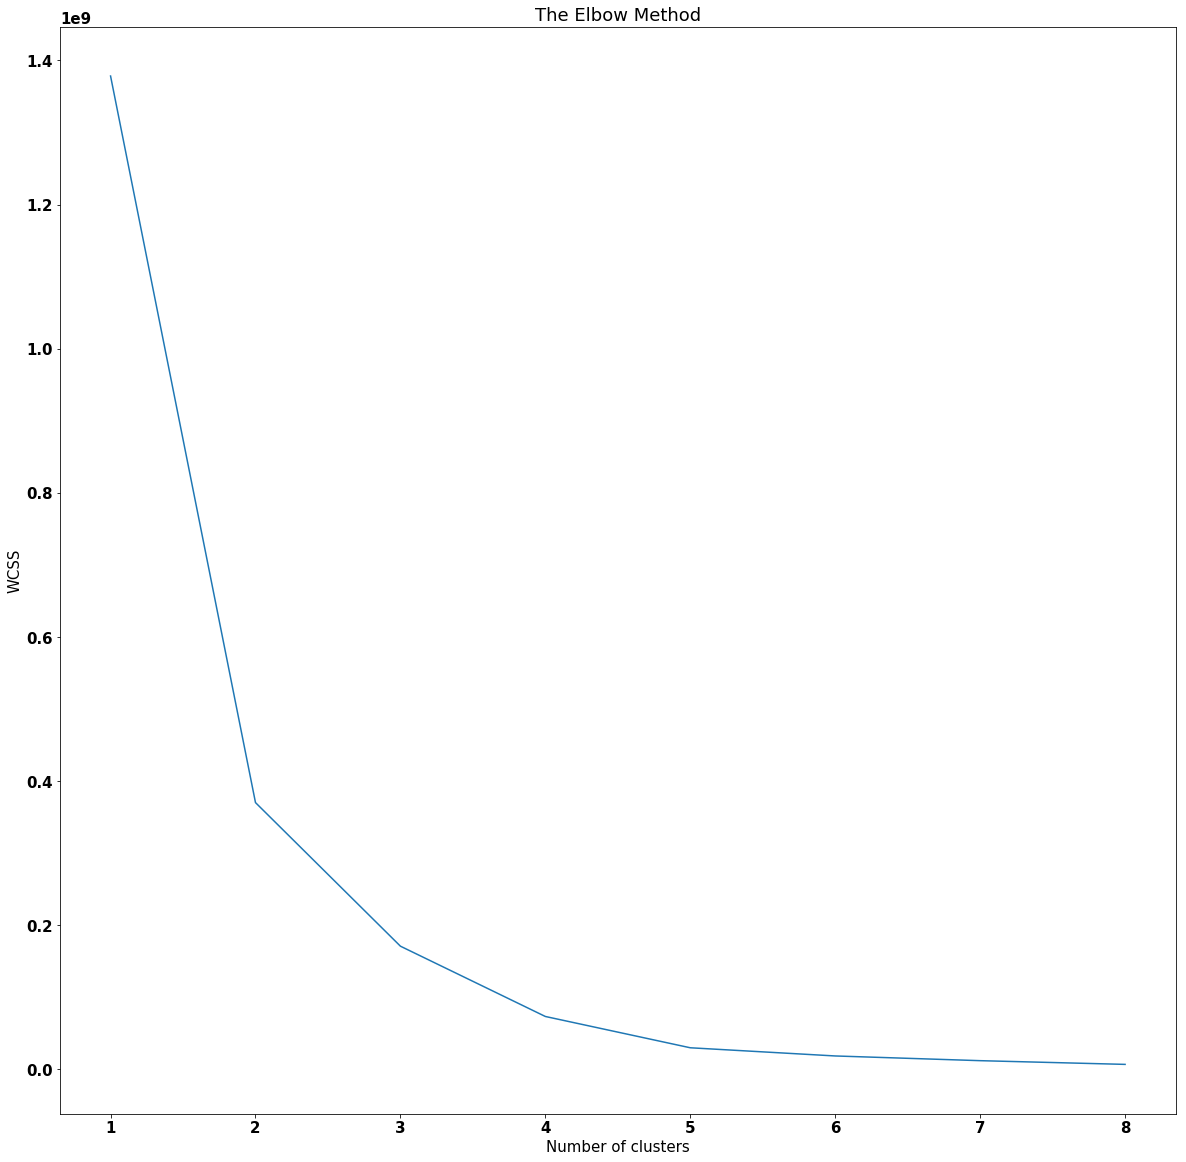

In [54]:
# change the graph siXe of a matplotlib plot
plt.rcParams['figure.figsize'] = (20, 20)

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 9):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(Y)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 9), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Apply Hierarchical Clustering

In [55]:
# Fitting Hierarchical Clustering to the array X
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
# Create Array with clusters
Y_hc = hc.fit_predict(Y)
Y_hc

array([2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2,
       1, 1, 1, 1, 2, 2, 0, 2, 1, 2, 0, 2, 0, 2])

In [56]:
# Add a X_hc array as Cluster column to a Trades dataframe
Traders['Cluster'] = Y_hc
Traders

,Buy Broker ID,Executed Qty,Index,Cluster
0,A11174628,2900,1,2
1,A11288376,6588,2,1
2,A125250,1445,3,2
3,A128271,2278,4,2
4,A163878,527,5,2
5,A170820,211,6,2
6,A2007006,4928,7,1
7,A203841,103,8,2
8,A550725,511,9,2
9,A8605026,2834,10,2


### Visualising the clusters

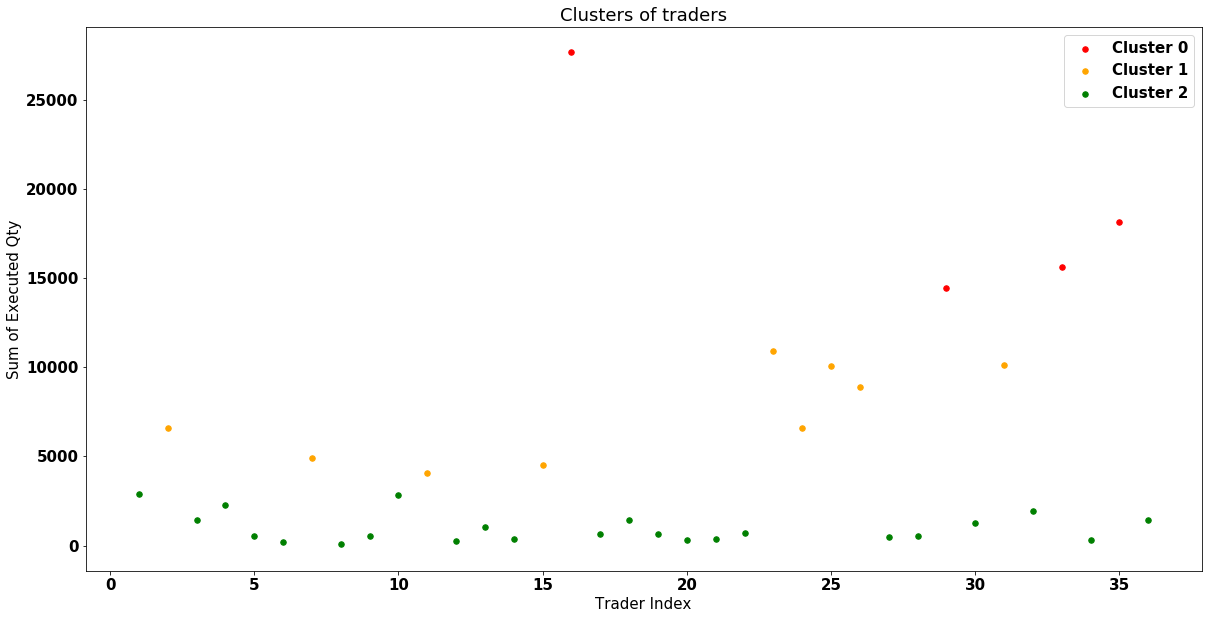

In [57]:
# change the graph size of a matplotlib plot
plt.rcParams['figure.figsize'] = (20, 10)
# Visualising the clusters
plt.scatter(Y[Y_hc == 0, 0], Y[Y_hc == 0, 1], s = 30, c = 'red', label = 'Cluster 0')
plt.scatter(Y[Y_hc == 1, 0], Y[Y_hc == 1, 1], s = 30, c = 'orange', label = 'Cluster 1')
plt.scatter(Y[Y_hc == 2, 0], Y[Y_hc == 2, 1], s = 30, c = 'green', label = 'Cluster 2')
plt.title('Clusters of traders')
plt.xlabel('Trader Index')
plt.ylabel('Sum of Executed Qty')
plt.legend()
plt.show()


### Calculating statistical information of clusters

In [59]:
# Calculating statistical information of clusters
Cluster_Statistics = Traders.groupby("Cluster")['Executed Qty'].describe()
Cluster_Statistics

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,4.0,18978.000000,6014.060193,14446.0,15320.5,16886.0,20543.5,27694.0
1,9.0,7409.888889,2644.599140,4068.0,4928.0,6588.0,10080.0,10907.0
2,23.0,983.826087,828.834212,103.0,380.5,634.0,1444.0,2900.0


### Outlier Traders

In [60]:
# Create outlier Trdaes Dataframe
Cluster = [0, 1]
Outlier_Traders= Traders[Traders.Cluster.isin(Cluster)]
Outlier_Traders

,Buy Broker ID,Executed Qty,Index,Cluster
1,A11288376,6588,2,1
6,A2007006,4928,7,1
10,A8982441,4068,11,1
14,B124251,4526,15,1
15,B128778,27694,16,0
22,B429816540,10907,23,1
23,B433077165,6570,24,1
24,B8734110,10080,25,1
25,C11084986,8904,26,1
28,C156520,14446,29,0


# Q2
## Identifing collusive trader group using Apriori Algorithm

**Association rule learning** is a rule-based machine learning method for discovering complex relationships between variables in large dataset. **Apriori** is an algorithm that use for frequent item set mining and association rule learning within databsets. It proceeds by identifying the frequent individual items in the database and extending them to larger and larger item sets as long as those item sets appear sufficiently often in the database.

**Stock market manipulations** as an organized **collusive trader groups** in stock market can be consider as one of major formats of market abuse, a Stock market manipulations can be extremely damaging to the proper functioning and integrity of capital markets. 

Market manipulation refers to artificially inflating or deflating the price of a stocks or otherwise influencing the behavior of the market for personal gain. Two common types of stock manipulation are pump and dump and poop and scoop. The pump and dump is the most frequently used manipulation to inflate a microcap stock by artificially buying and then sell out, leaving later followers to hold the loss.
Manipulation is variously called price manipulation, stock manipulation, and market manipulation. However, in this approach let’s focus more about **price manipulation** and **run Apriori to identify frequent traders within the segments which shows considerable amount of stock price changes**.

## Data preprocessing with pandas

In [69]:
# Create NumPy array with Execute Price of Trades
Z = Trades.iloc[:, [ 8, 2]].values
Z

array([[1.000e+00, 1.971e+01],
       [2.000e+00, 1.971e+01],
       [3.000e+00, 1.971e+01],
       ...,
       [1.978e+03, 1.071e+01],
       [1.979e+03, 1.071e+01],
       [1.980e+03, 1.071e+01]])

### Visualising the variation of executed price within the dataset

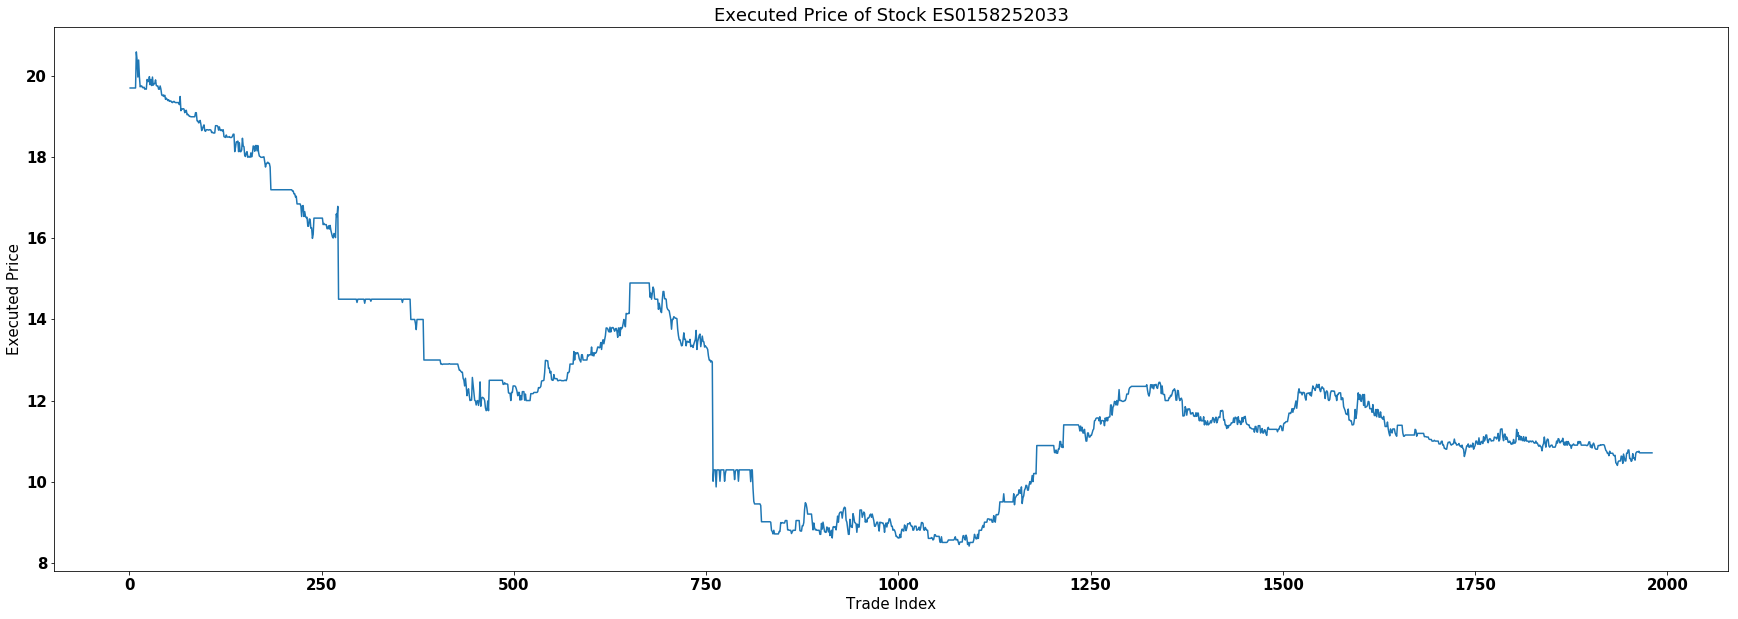

In [70]:
# change the graph size of a matplotlib plot
plt.rcParams['figure.figsize'] = (30, 10)
# Plotting the graph of Executed Price of Stock ES0158252033
plt.plot(Z[:,0], Z[:,1])
plt.title('Executed Price of Stock ES0158252033')
plt.xlabel('Trade Index')
plt.ylabel('Executed Price')
plt.show()

By observing above price variation within the dataset its clear the requirement of some technique to identify the segment within dataset that has considerable amount of price variations. Hierarchical clustering with larger of clusters **(200 clusters)** can used to sample dataset into smaller segments. Then the standard deviation of the data points within each cluster can used as parameter of price variance present in the cluster. Then Apriori algorithm can run to identify the frequent traders who trade in these segments.

### Applying Hierarchical Clustering to identify segment where considerable amount of price variations are present within the dataset.

In [71]:
# Fitting Hierarchical Clustering to the array Z
hc = AgglomerativeClustering(n_clusters = 200, affinity = 'euclidean', linkage = 'ward')
# Create Array with clusters
Z_hc = hc.fit_predict(Z)
Z_hc

array([174, 174, 174, ..., 144, 144, 144])

In [72]:
# Add a Z_hc array as Cluster column to a Trades dataframe
Trades['Cluster'] = Z_hc
Trades

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Trade Date,Executed Qty,Executed Price,Stock,Buy Order ID,Sell Order ID,Sell Broker ID,Buy Broker ID,Index,Cluster
3,01JUL2014:09:00:00,1,19.71,ES0158252033,10442111564,10442101372,A163878,B204480,1,174
4,01JUL2014:09:00:00,1,19.71,ES0158252033,10442101373,10442101368,A2007006,A163878,2,174
5,01JUL2014:09:00:00,2,19.71,ES0158252033,10442111564,10442101377,B133386,B204480,3,174
6,01JUL2014:09:00:00,6,19.71,ES0158252033,10442101375,10442101359,B128778,B128778,4,174
7,01JUL2014:09:00:00,12,19.71,ES0158252033,10442101383,10442101368,A2007006,C439398190,5,174
8,01JUL2014:09:00:00,18,19.71,ES0158252033,10442101367,10442101368,A2007006,C424759231,6,174
9,01JUL2014:09:00:00,44,19.71,ES0158252033,10442101375,10442101368,A2007006,B128778,7,174
10,01JUL2014:09:00:00,75,19.71,ES0158252033,10442111564,10442101368,A2007006,B204480,8,174
11,01JUL2014:09:00:03,14,20.60,ES0158252033,10434416337,10442101363,C8329321,C11084986,9,93
12,01JUL2014:09:00:03,64,20.40,ES0158252033,10442101384,10427330904,C9324721,A8605026,10,93


### Identify the clusters which has considerable amount of price variations

In [73]:
# compute a summary statistic for each clusters using groupby aggregation
Cluster_Statistics_Price = Trades.groupby("Cluster")['Executed Price'].describe()
# Add a index clounm to Cluster Statistics Price dataframe
Cluster_Statistics_Price['Index'] = range(0, len(Cluster_Statistics_Price)+0)
# Sort all clusters according to ascending order by standard deviation
Cluster_Statistics_Price = Cluster_Statistics_Price.sort_values(by ='std', ascending=False).reset_index()
Cluster_Statistics_Price

,Cluster,count,mean,std,min,25%,50%,75%,max,Index
0,0,14.0,11.612143,1.482577e+00,9.87,10.2900,11.620,12.9950,13.26,0
1,2,14.0,15.297857,9.765889e-01,14.50,14.5000,14.500,16.1150,16.79,2
2,93,8.0,20.078750,3.409414e-01,19.74,19.7600,19.985,20.4000,20.60,93
3,38,13.0,9.609231,3.193342e-01,9.41,9.4500,9.450,9.5100,10.29,38
4,5,14.0,14.189286,2.870128e-01,13.75,14.0000,14.000,14.5000,14.50,5
5,66,10.0,12.092000,2.258712e-01,11.88,11.9900,12.000,12.1525,12.57,66
6,8,14.0,11.942143,2.104639e-01,11.62,11.8050,12.005,12.0550,12.25,8
7,31,12.0,12.258333,2.078388e-01,12.00,12.0950,12.255,12.3950,12.55,31
8,65,12.0,11.970833,2.017405e-01,11.75,11.8075,11.995,12.0550,12.46,65
9,27,13.0,16.379231,1.938841e-01,16.00,16.2600,16.470,16.5200,16.66,27


Lets select all the clusters which has standard deviation more than 0.1 to input in to Apriori algorithm. From above summary statistic for each clusters using groupby aggregation we can identify 52 clusters which has standard deivation more than 0.1.

In [0]:
# Drop all clusters has standard deviation less than 0.1
T_Clusters = Cluster_Statistics_Price.iloc[0:52, [9]]
T_Clusters

### Create a list of lists to input to Apriori algorithm

Apriori library I am going to use requires input dataset to be in the form of a list of lists. Therefore as a final step of the Data preprocessing process lets create transaction list of list.

In [0]:
# Create a list of lists ()
transactions = (
     [Trades.loc[Trades.Cluster==0, :]['Buy Broker ID'].unique().tolist() + Trades.loc[Trades.Cluster==0, :]['Sell Broker ID'].unique().tolist()] +
     [Trades.loc[Trades.Cluster==2, :]['Buy Broker ID'].unique().tolist() + Trades.loc[Trades.Cluster==2, :]['Sell Broker ID'].unique().tolist()] +
     [Trades.loc[Trades.Cluster==93, :]['Buy Broker ID'].unique().tolist() + Trades.loc[Trades.Cluster==93, :]['Sell Broker ID'].unique().tolist()] +
     [Trades.loc[Trades.Cluster==38, :]['Buy Broker ID'].unique().tolist() + Trades.loc[Trades.Cluster==38, :]['Sell Broker ID'].unique().tolist()] +
     [Trades.loc[Trades.Cluster==5, :]['Buy Broker ID'].unique().tolist() + Trades.loc[Trades.Cluster==5, :]['Sell Broker ID'].unique().tolist()] +
     [Trades.loc[Trades.Cluster==66, :]['Buy Broker ID'].unique().tolist() + Trades.loc[Trades.Cluster==66, :]['Sell Broker ID'].unique().tolist()] +
     [Trades.loc[Trades.Cluster==8, :]['Buy Broker ID'].unique().tolist() + Trades.loc[Trades.Cluster==8, :]['Sell Broker ID'].unique().tolist()] +
     [Trades.loc[Trades.Cluster==31, :]['Buy Broker ID'].unique().tolist() + Trades.loc[Trades.Cluster==31, :]['Sell Broker ID'].unique().tolist()] +
     [Trades.loc[Trades.Cluster==65, :]['Buy Broker ID'].unique().tolist() + Trades.loc[Trades.Cluster==65, :]['Sell Broker ID'].unique().tolist()] +
     [Trades.loc[Trades.Cluster==27, :]['Buy Broker ID'].unique().tolist() + Trades.loc[Trades.Cluster==27, :]['Sell Broker ID'].unique().tolist()] +
     [Trades.loc[Trades.Cluster==3, :]['Buy Broker ID'].unique().tolist() + Trades.loc[Trades.Cluster==3, :]['Sell Broker ID'].unique().tolist()] +
     [Trades.loc[Trades.Cluster==108, :]['Buy Broker ID'].unique().tolist() + Trades.loc[Trades.Cluster==108, :]['Sell Broker ID'].unique().tolist()] +
     [Trades.loc[Trades.Cluster==194, :]['Buy Broker ID'].unique().tolist() + Trades.loc[Trades.Cluster==194, :]['Sell Broker ID'].unique().tolist()] +
     [Trades.loc[Trades.Cluster==172, :]['Buy Broker ID'].unique().tolist() + Trades.loc[Trades.Cluster==172, :]['Sell Broker ID'].unique().tolist()] +
     [Trades.loc[Trades.Cluster==52, :]['Buy Broker ID'].unique().tolist() + Trades.loc[Trades.Cluster==52, :]['Sell Broker ID'].unique().tolist()] +
     [Trades.loc[Trades.Cluster==109, :]['Buy Broker ID'].unique().tolist() + Trades.loc[Trades.Cluster==109, :]['Sell Broker ID'].unique().tolist()] +
     [Trades.loc[Trades.Cluster==28, :]['Buy Broker ID'].unique().tolist() + Trades.loc[Trades.Cluster==28, :]['Sell Broker ID'].unique().tolist()] +
     [Trades.loc[Trades.Cluster==35, :]['Buy Broker ID'].unique().tolist() + Trades.loc[Trades.Cluster==35, :]['Sell Broker ID'].unique().tolist()] +
     [Trades.loc[Trades.Cluster==39, :]['Buy Broker ID'].unique().tolist() + Trades.loc[Trades.Cluster==39, :]['Sell Broker ID'].unique().tolist()] +
     [Trades.loc[Trades.Cluster==47, :]['Buy Broker ID'].unique().tolist() + Trades.loc[Trades.Cluster==47, :]['Sell Broker ID'].unique().tolist()] +
     [Trades.loc[Trades.Cluster==123, :]['Buy Broker ID'].unique().tolist() + Trades.loc[Trades.Cluster==123, :]['Sell Broker ID'].unique().tolist()] +
     [Trades.loc[Trades.Cluster==158, :]['Buy Broker ID'].unique().tolist() + Trades.loc[Trades.Cluster==158, :]['Sell Broker ID'].unique().tolist()] +
     [Trades.loc[Trades.Cluster==173, :]['Buy Broker ID'].unique().tolist() + Trades.loc[Trades.Cluster==173, :]['Sell Broker ID'].unique().tolist()] +
     [Trades.loc[Trades.Cluster==81, :]['Buy Broker ID'].unique().tolist() + Trades.loc[Trades.Cluster==81, :]['Sell Broker ID'].unique().tolist()] +
     [Trades.loc[Trades.Cluster==147, :]['Buy Broker ID'].unique().tolist() + Trades.loc[Trades.Cluster==147, :]['Sell Broker ID'].unique().tolist()] +
     [Trades.loc[Trades.Cluster==77, :]['Buy Broker ID'].unique().tolist() + Trades.loc[Trades.Cluster==77, :]['Sell Broker ID'].unique().tolist()] +
     [Trades.loc[Trades.Cluster==49, :]['Buy Broker ID'].unique().tolist() + Trades.loc[Trades.Cluster==49, :]['Sell Broker ID'].unique().tolist()] +
     [Trades.loc[Trades.Cluster==167, :]['Buy Broker ID'].unique().tolist() + Trades.loc[Trades.Cluster==167, :]['Sell Broker ID'].unique().tolist()] +
     [Trades.loc[Trades.Cluster==95, :]['Buy Broker ID'].unique().tolist() + Trades.loc[Trades.Cluster==95, :]['Sell Broker ID'].unique().tolist()] +
     [Trades.loc[Trades.Cluster==16, :]['Buy Broker ID'].unique().tolist() + Trades.loc[Trades.Cluster==16, :]['Sell Broker ID'].unique().tolist()] +
     [Trades.loc[Trades.Cluster==134, :]['Buy Broker ID'].unique().tolist() + Trades.loc[Trades.Cluster==134, :]['Sell Broker ID'].unique().tolist()] + 
     [Trades.loc[Trades.Cluster==6, :]['Buy Broker ID'].unique().tolist() + Trades.loc[Trades.Cluster==6, :]['Sell Broker ID'].unique().tolist()] +
     [Trades.loc[Trades.Cluster==13, :]['Buy Broker ID'].unique().tolist() + Trades.loc[Trades.Cluster==13, :]['Sell Broker ID'].unique().tolist()] +
     [Trades.loc[Trades.Cluster==60, :]['Buy Broker ID'].unique().tolist() + Trades.loc[Trades.Cluster==60, :]['Sell Broker ID'].unique().tolist()] +
     [Trades.loc[Trades.Cluster==146, :]['Buy Broker ID'].unique().tolist() + Trades.loc[Trades.Cluster==146, :]['Sell Broker ID'].unique().tolist()] +
     [Trades.loc[Trades.Cluster==64, :]['Buy Broker ID'].unique().tolist() + Trades.loc[Trades.Cluster==64, :]['Sell Broker ID'].unique().tolist()] +
     [Trades.loc[Trades.Cluster==191, :]['Buy Broker ID'].unique().tolist() + Trades.loc[Trades.Cluster==191, :]['Sell Broker ID'].unique().tolist()] +
     [Trades.loc[Trades.Cluster==132, :]['Buy Broker ID'].unique().tolist() + Trades.loc[Trades.Cluster==132, :]['Sell Broker ID'].unique().tolist()] +
     [Trades.loc[Trades.Cluster==155, :]['Buy Broker ID'].unique().tolist() + Trades.loc[Trades.Cluster==155, :]['Sell Broker ID'].unique().tolist()] +
     [Trades.loc[Trades.Cluster==83, :]['Buy Broker ID'].unique().tolist() + Trades.loc[Trades.Cluster==83, :]['Sell Broker ID'].unique().tolist()] +
     [Trades.loc[Trades.Cluster==50, :]['Buy Broker ID'].unique().tolist() + Trades.loc[Trades.Cluster==50, :]['Sell Broker ID'].unique().tolist()] +
     [Trades.loc[Trades.Cluster==128, :]['Buy Broker ID'].unique().tolist() + Trades.loc[Trades.Cluster==128, :]['Sell Broker ID'].unique().tolist()] +
     [Trades.loc[Trades.Cluster==40, :]['Buy Broker ID'].unique().tolist() + Trades.loc[Trades.Cluster==40, :]['Sell Broker ID'].unique().tolist()] +
     [Trades.loc[Trades.Cluster==186, :]['Buy Broker ID'].unique().tolist() + Trades.loc[Trades.Cluster==186, :]['Sell Broker ID'].unique().tolist()] +
     [Trades.loc[Trades.Cluster==137, :]['Buy Broker ID'].unique().tolist() + Trades.loc[Trades.Cluster==137, :]['Sell Broker ID'].unique().tolist()] +
     [Trades.loc[Trades.Cluster==17, :]['Buy Broker ID'].unique().tolist() + Trades.loc[Trades.Cluster==17, :]['Sell Broker ID'].unique().tolist()] +
     [Trades.loc[Trades.Cluster==29, :]['Buy Broker ID'].unique().tolist() + Trades.loc[Trades.Cluster==29, :]['Sell Broker ID'].unique().tolist()] +
     [Trades.loc[Trades.Cluster==97, :]['Buy Broker ID'].unique().tolist() + Trades.loc[Trades.Cluster==97, :]['Sell Broker ID'].unique().tolist()] +
     [Trades.loc[Trades.Cluster==91, :]['Buy Broker ID'].unique().tolist() + Trades.loc[Trades.Cluster==91, :]['Sell Broker ID'].unique().tolist()] +
     [Trades.loc[Trades.Cluster==68, :]['Buy Broker ID'].unique().tolist() + Trades.loc[Trades.Cluster==68, :]['Sell Broker ID'].unique().tolist()] +
     [Trades.loc[Trades.Cluster==85, :]['Buy Broker ID'].unique().tolist() + Trades.loc[Trades.Cluster==85, :]['Sell Broker ID'].unique().tolist()] +
     [Trades.loc[Trades.Cluster==10, :]['Buy Broker ID'].unique().tolist() + Trades.loc[Trades.Cluster==10, :]['Sell Broker ID'].unique().tolist()])
transactions

## Training Apriori on the dataset to identify potential collusive trader groups (Model forming)

In [79]:
rules_test = apriori(transactions, min_support = 0.1,min_confidence = 0.3, min_lift = 1.0001)
# Create a list with all potential collusive trader groups
results_test = list(rules_test)
# Visualising the number of potential collusive trader groups  
print(len(results_test))

717


## Visualising the potential collusive trader groups 

In [80]:
  the_rules = [] 
for result in results_test: 
    the_rules.append({'Collusive Trader Groups Test': ','.join(result.items),
                      'Support':result.support, 
                      'Confidence':result.ordered_statistics[0].confidence,
                      'Lift':result.ordered_statistics[0].lift})
# Create a dataframe with all potential collusive trader groups
collusive_trader_groups_test = (pd.DataFrame(the_rules, columns = ['Collusive Trader Groups Test', 'Support', 'Confidence', 'Lift'])).sort_values(by ='Support', ascending=False)
# Sort all potential collusive trader groups according to ascending order by support
collusive_trader_groups_test = collusive_trader_groups_test.sort_values(by ='Support', ascending=False)
collusive_trader_groups_test

,Collusive Trader Groups Test,Support,Confidence,Lift
52,"B128778,B429816540",0.653846,0.739130,1.011442
56,"B128778,C8329321",0.634615,0.717391,1.008226
57,"B128778,C9324721",0.615385,0.695652,1.033540
72,"B429816540,C8329321",0.538462,0.736842,1.035562
73,"B429816540,C9324721",0.500000,0.684211,1.016541
86,"C8329321,C9324721",0.480769,0.675676,1.003861
70,"B429816540,C424759231",0.461538,0.631579,1.026316
252,"B128778,C9324721,B429816540",0.461538,0.705882,1.048739
271,"B128778,C8329321,C9324721",0.442308,0.696970,1.035498
68,"B433077165,B429816540",0.442308,0.605263,1.258947


### Training Apriori on the transaction list to filter best collusive trader groups ( Model Tuning)

As a step of model tuning in order to filter out strongest rules form above 717 potential rules, lets set the parameters of Apriori algorithm as follow,

**Minimum Support = 0.15**

**Minimum Confidence = 0.75**

**Minimum Lift = 2**

**Minimum length = 2**